In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/BrentOilPrices.csv')
df.tail()

,Date,Price
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37
9010,"Nov 14, 2022",93.59


In [13]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(df['Price'], order=(1,1,1))
arima_result = model.fit()

# Forecast next 30 days
forecast = arima_result.forecast(steps=30)
print(forecast)

9011    93.497255
9012    93.529037
9013    93.518146
9014    93.521878
9015    93.520599
9016    93.521037
9017    93.520887
9018    93.520939
9019    93.520921
9020    93.520927
9021    93.520925
9022    93.520926
9023    93.520926
9024    93.520926
9025    93.520926
9026    93.520926
9027    93.520926
9028    93.520926
9029    93.520926
9030    93.520926
9031    93.520926
9032    93.520926
9033    93.520926
9034    93.520926
9035    93.520926
9036    93.520926
9037    93.520926
9038    93.520926
9039    93.520926
9040    93.520926
Name: predicted_mean, dtype: float64


Model Validation

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = df['Price'][-30:]  # Actual values
y_pred = forecast  # ARIMA Forecast

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"ARIMA Model - MAE: {mae}, RMSE: {rmse}")

ARIMA Model - MAE: 2.042399745472548, RMSE: 2.620176207895593


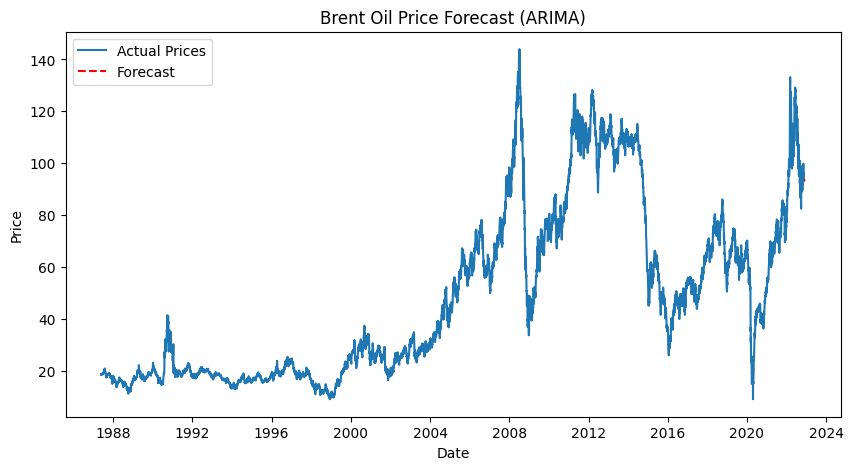

In [11]:
# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df["Price"], label="Actual Prices")
forecast_dates = pd.date_range(df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(forecast_dates, forecast, label="Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title("Brent Oil Price Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

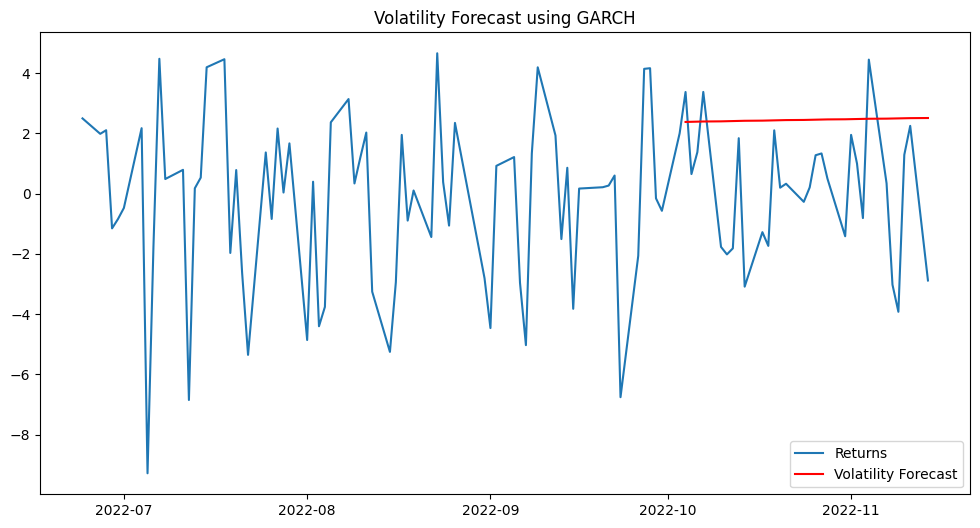

In [7]:
import sys
sys.path.append("../scripts")

# Prepare the data for garch
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Return'] = df['Price'].pct_change().dropna()

from statistical_modelling import train_garch

train_garch(df)